In [2]:
print("Hello World")

Hello World


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("housing.csv")

In [ ]:
# ML მოდელის აგების ნაბიჯები

# 1. მოგვაქვს მონაცემები
# 2. ანალიზს ვუკეთებთ მონაცემებს 
# 3. ვუკეთებთ ვიზუალიზაციას
# 4. Core ML Practices - 
#  - 1. ვყოფთ ჩვენს მონაცემებს input and output ად - x ( input features), y ( output_features )
#  - 2. მონაცემებს ვყოფთ Training and Testing ად -  ოდელი ხედავს მხოლოდ ტრენინგის მონაცემებს, ტესტირების მონაცემები სრულიად ახალი მონაცემებია და მოდელის შესრულება მოწმდება ამ ახალ მონაცემებზე
#  - 3. საჭიროა საჭირო ბიბლიოთეკების მოდელირება - LinearRegression - LinearRegression Code of sklearn: ML Library of python (Getting the model)
#  - 4. Make predictions on new data (Test data) - after getting the predictions
#  - 5. Evaluate the performance of my model by comparing observed values in the test data. (known to me) and the predicted values by the model

# ვაშენებ მოდელს - ვაფასებ მის მუშაობას - შემდეგ შესრულების მიხედვით - ვწყვეტთ და ვაგრძელებთ, ავირჩიოთ თუ არა სხვა მოდელი, და შევცვალოთ თუ არა მონაცემები

# THINGS ARE NOT WORKING OUT

# 1. Data - Garbage in = Garbage Out
# 2. Wrong Model Type - Regression - Linear Regresion,  DecisionTreeRegressor, RandomFrorestRegressor, XGBRegressor .....
# 3. Relationship between input and out is not Linear - you're trying to fit a Linear model to them - Fail - relationship and the model are not aligned
# $ Models should be capable of handling the complexity in the data 

In [119]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [140]:
# Visualization - 

df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [142]:
import matplotlib.pyplot as plt


In [147]:
df['total_rooms'] # ეს არის სიხშირით განაწილების დიაგრამა , რომ აღვიქვათ არის თუარა მონაცემების უკუსვლა და ასეშემდეგ

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

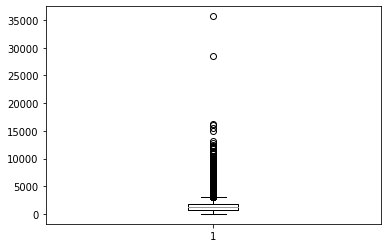

In [149]:
# Boxplot - არის ვიზუალიზაციის ხელსაწყო, რომელიც დაგეხმარებათ იმის გარკვევაში, არის თუ არა რამე გამოკვეთილი მონაცემებში

plt.boxplot(df['population'])
plt.show()

In [150]:
# კოეფიციენტებისა და თვისებების შექმნა

In [152]:
# თუ ქვეყანაში  - მოსახლეობამეტია - ერთი ოჯახში მყოფების ბევრნი იქნებიან
# ინდივიდუალურად - მოსახლეობა - იქნება გამოკვეთილად, households - might show an outlier
# მაგრამ, თუ თანაფარდობა - შინამეურნეობები: მოსახლეობა - არ არის გამოკვეთი - htne ეს მწკრივიც არ არის გამოკვეთილი


In [155]:
df['households_to_population'] = df['households'] / df['population']

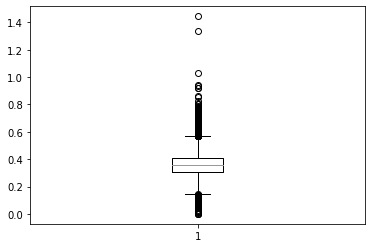

In [157]:
plt.boxplot(df['households_to_population'])
plt.show()

In [158]:
# კორელაცია - არის მონაცემთა მსგავსება მრავალ სვეტში -
import seaborn as sns

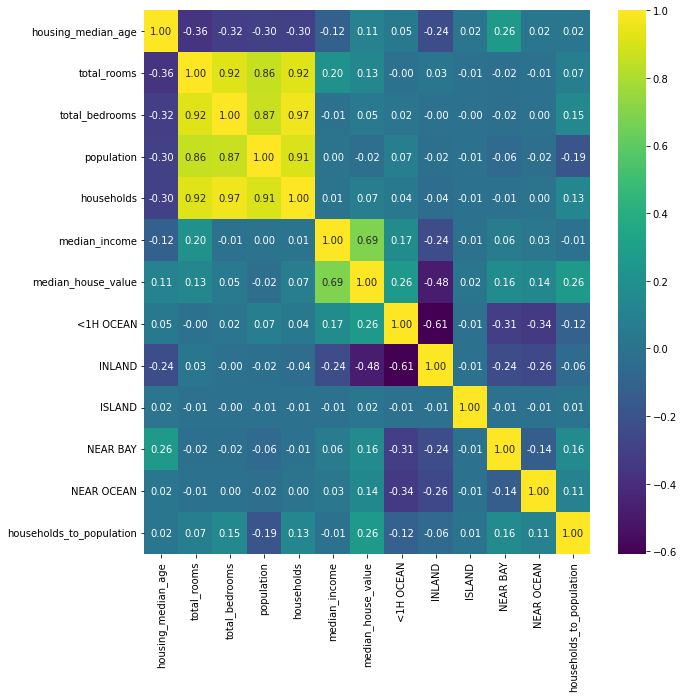

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'viridis', annot= True, fmt = '.2f')

In [ ]:
df.drop(columns = ['longitude','latitude'], inplace = True )

In [ ]:
df['ocean_proximity'].value_counts()

In [ ]:
#კატეგორიული ტრანსოფრმაცია ამ სვეტზე

In [ ]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis = 1).drop(columns = ['ocean_proximity'])

In [122]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [74]:
# step 1 - დავყოთ მონაცემები  X ად და Y ად(Input and output Features)

In [126]:
df = df.fillna(0)

In [123]:
x = df.drop(columns = ['median_house_value'])
y = df['median_house_value']

In [124]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [78]:
x

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [125]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x , y , train_size = 0.8)

In [127]:
x_train.shape

(16512, 11)

In [82]:
x_test.shape

(4128, 11)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr = LinearRegression() # very important

In [85]:
# y = ax + b  # ცარიელი განტოლება

In [86]:
lr.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred = lr.predict(x_test)

In [101]:
# შესრულების მეტრიკა
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
mean_squared_error(y_pred, y_test) # რაოდენობრივად განსაზღვრავს შეცდომას ჩემთვის


4767572852.163484

In [105]:
r2_score(y_pred, y_test) # r2 score - მეუბნება მიმართულებით, რამდენად კარგია თუ ცუდი მოდელი


0.4308838521437719

In [106]:
# 200 rows of data  - 100 rows training and 100 rows testing -- Not given the model enough data to learn from

In [128]:
# განხორციელდა ერთიანი ხაზოვანი რეგრესიის მოდელი


In [130]:
#შემთხვევითი forest ის რეგრესია

from sklearn.ensemble import RandomForestRegressor

In [131]:
rfr = RandomForestRegressor() # მოდელის ინიციალიზაცია

In [132]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [135]:
y_pred = rfr.predict(x_test)

In [136]:
r2_score(y_pred , y_test)

0.6104707759311034

In [138]:
mean_squared_error(y_pred, y_test)

3747462073.580812